In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")



In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Dataset overview
print("Dataset Shape:", df.shape)  # Number of rows and columns
print("Column Information:")
print(df.info())  # Column data types and non-null counts

print("\nSummary Statistics:")
print(df.describe())  

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (891, 12)
Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838   

In [5]:

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify missing values again
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Missing Values After Cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


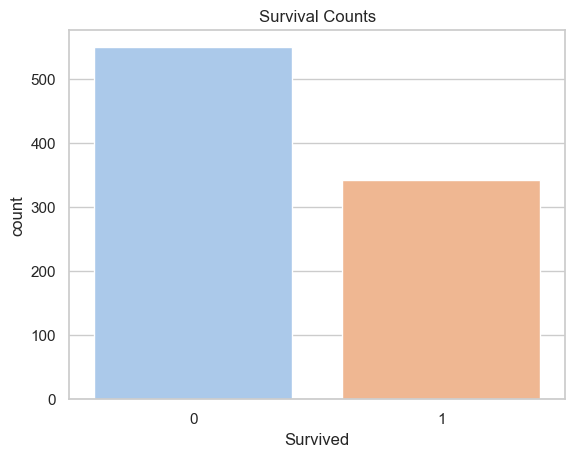

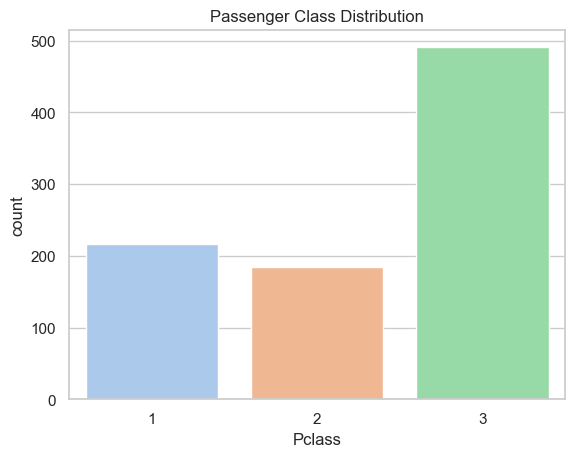

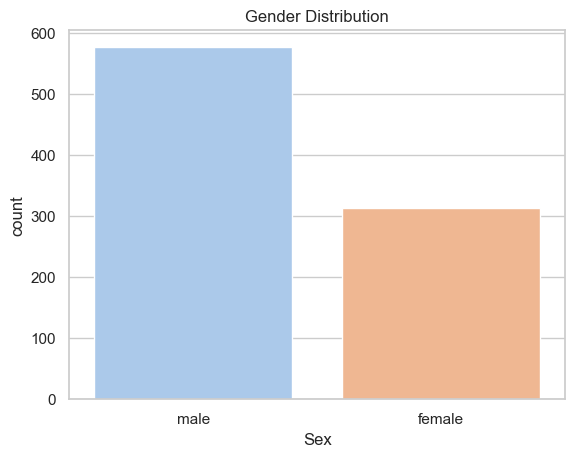

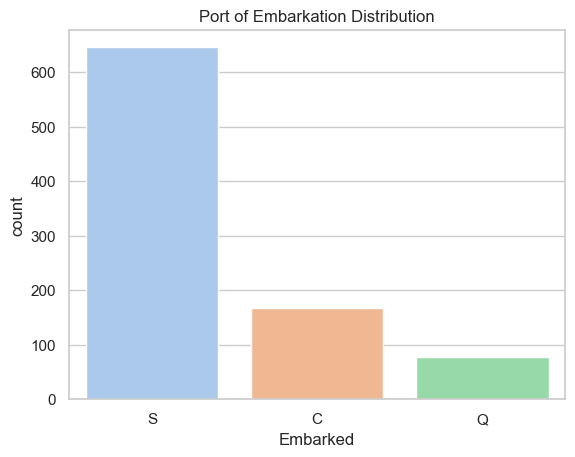

In [6]:
# Countplot for 'Survived'
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title("Survival Counts")
plt.show()

# Countplot for 'Pclass'
sns.countplot(x='Pclass', data=df, palette='pastel')
plt.title("Passenger Class Distribution")
plt.show()

# Countplot for 'Sex'
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.show()

# Countplot for 'Embarked'
sns.countplot(x='Embarked', data=df, palette='pastel')
plt.title("Port of Embarkation Distribution")
plt.show()


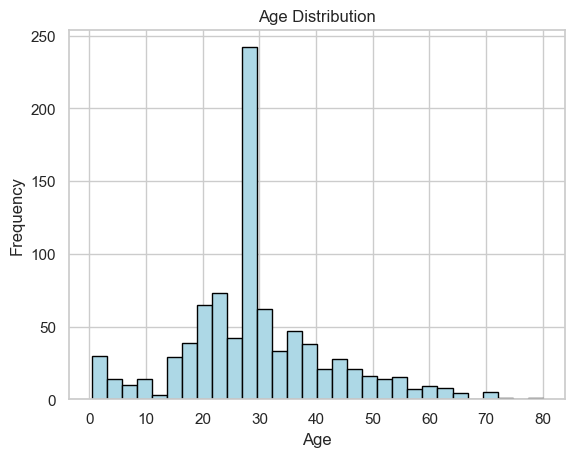

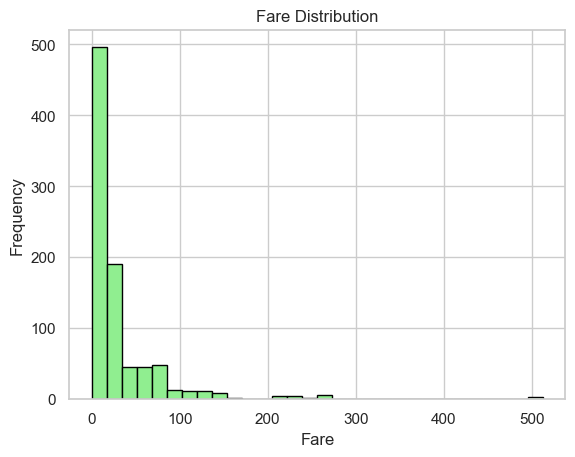

In [7]:
# Histogram for Age
df['Age'].hist(bins=30, color='lightblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Histogram for Fare
df['Fare'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


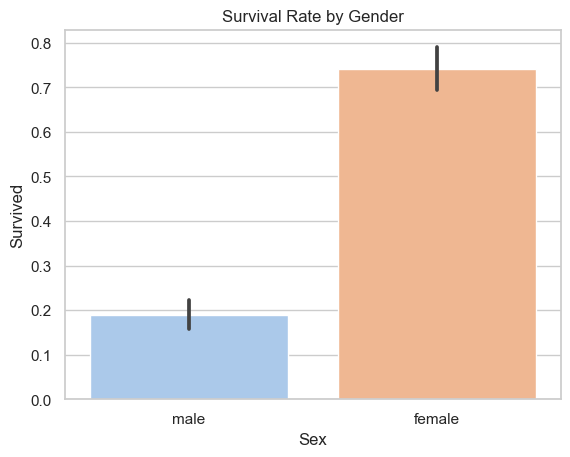

In [8]:
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title("Survival Rate by Gender")
plt.show()


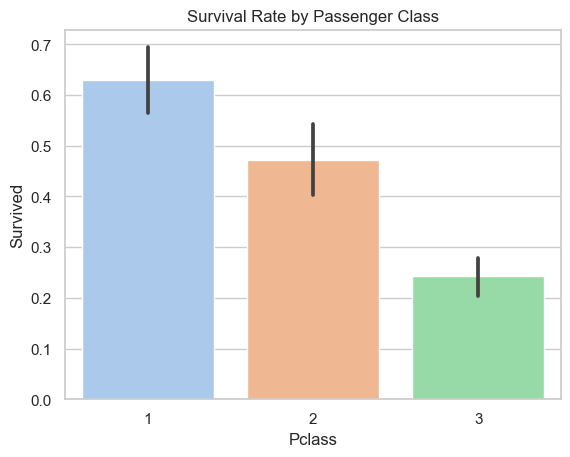

In [9]:
sns.barplot(x='Pclass', y='Survived', data=df, palette='pastel')
plt.title("Survival Rate by Passenger Class")
plt.show()




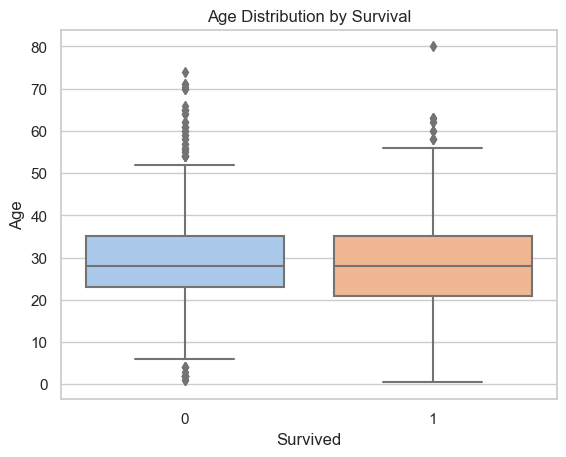

In [10]:
sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')
plt.title("Age Distribution by Survival")
plt.show()




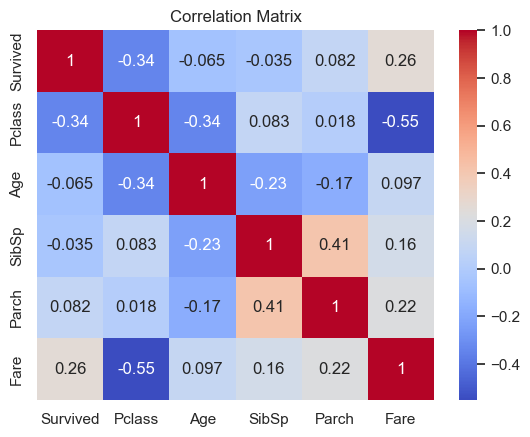

In [13]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


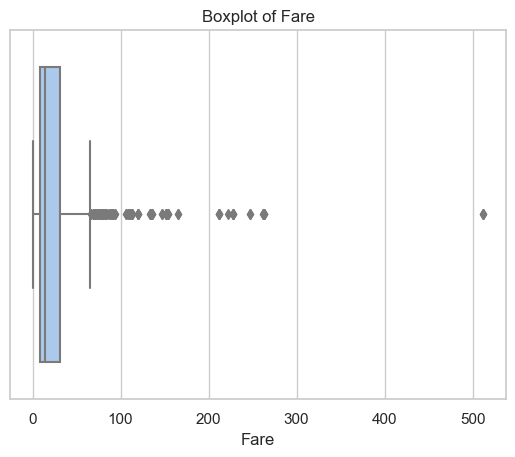

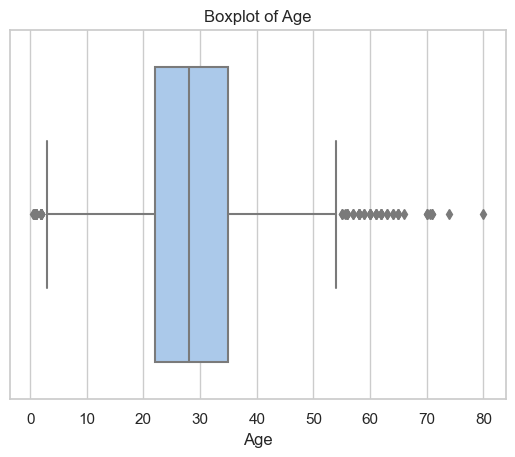

In [14]:
# Boxplot for Fare
sns.boxplot(x='Fare', data=df, palette='pastel')
plt.title("Boxplot of Fare")
plt.show()

# Boxplot for Age
sns.boxplot(x='Age', data=df, palette='pastel')
plt.title("Boxplot of Age")
plt.show()
